## <font color = blue> Load the data </font>

In [1]:
# install stargazer package
install.packages("stargazer", repos="http://cran.us.r-project.org")
library(stargazer)

package 'stargazer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehuang\AppData\Local\Temp\RtmpIzGzzd\downloaded_packages


Warning message:
"package 'stargazer' was built under R version 3.5.2"
Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [2]:
crime = read.csv("crime_v2.csv")
# crime = data.frame(crime)

In [3]:
# see # of rows and columns
dim(crime)

# look at crime data
head(crime)

str(crime)

[1] 97 25

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,...,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,...,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,...,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,...,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,...,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,...,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

## <font color = blue> Stage 1: Draft Report - Due 24 hours before Live Session 12 </font>

* Understand the determinants of crime
* Address the concerns of the political campaign
* Model building
* Regression table with minimum 3 model specifications

### Variable Selection

General hypothesis on "determinants" of crime (crmrte):
* taxpc -> lower income neighborhoods an indicator of social stress
* prbarr -> higher probability of arrest may mean more crime
* prbconv -> higher probability of conviction may mean more crime
* polpc -> more police may be an indication of crime. May be a lagging indicator
* density -> more people in less area may lead to more crime?
* pctymle -> male population typically associated with more violence

### Exploratory Data Analysis

In [4]:
# transform prbconv into numeric
crime$prbconv <- as.numeric(crime$prbconv)

# remove the N/A values
crime <- crime[-c(92:97),]

# confirm the last 6 rows of N/A is removed
dim(crime)

[1] 91 25

In [6]:
# explore crmrte
summary(crime$crmrte)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020927 0.029986 0.033400 0.039642 0.098966 

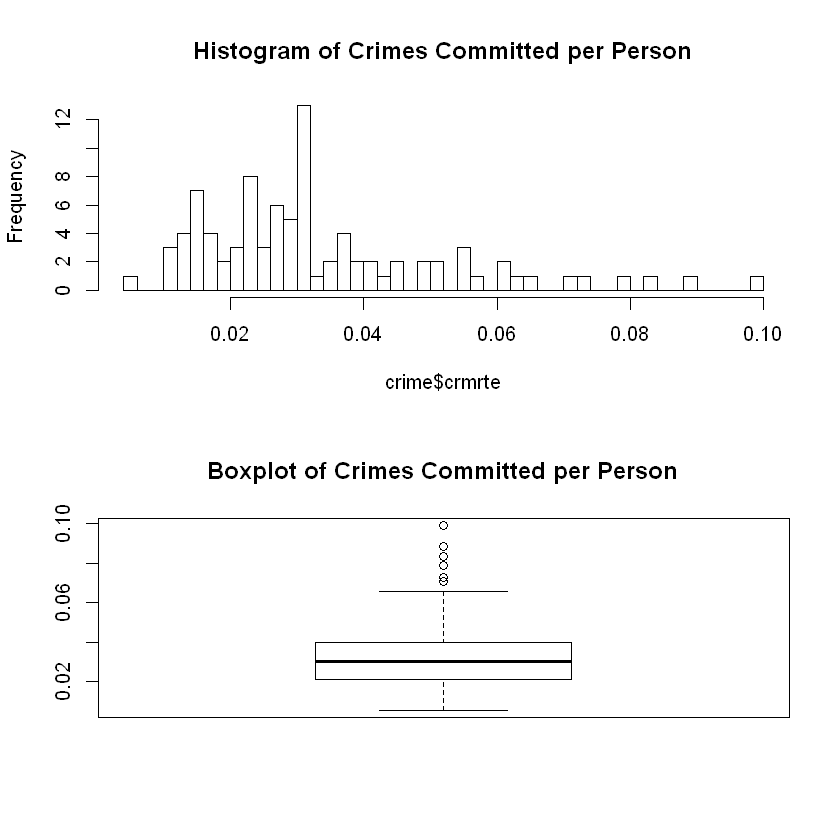

In [7]:
# understand distribution of crmrte 
par("pty", mfrow = c(2,1))

hist(crime$crmrte, main = "Histogram of Crimes Committed per Person", breaks = 50)

boxplot(crime$crmrte, main = "Boxplot of Crimes Committed per Person")

**Plot our hypothesis variables**

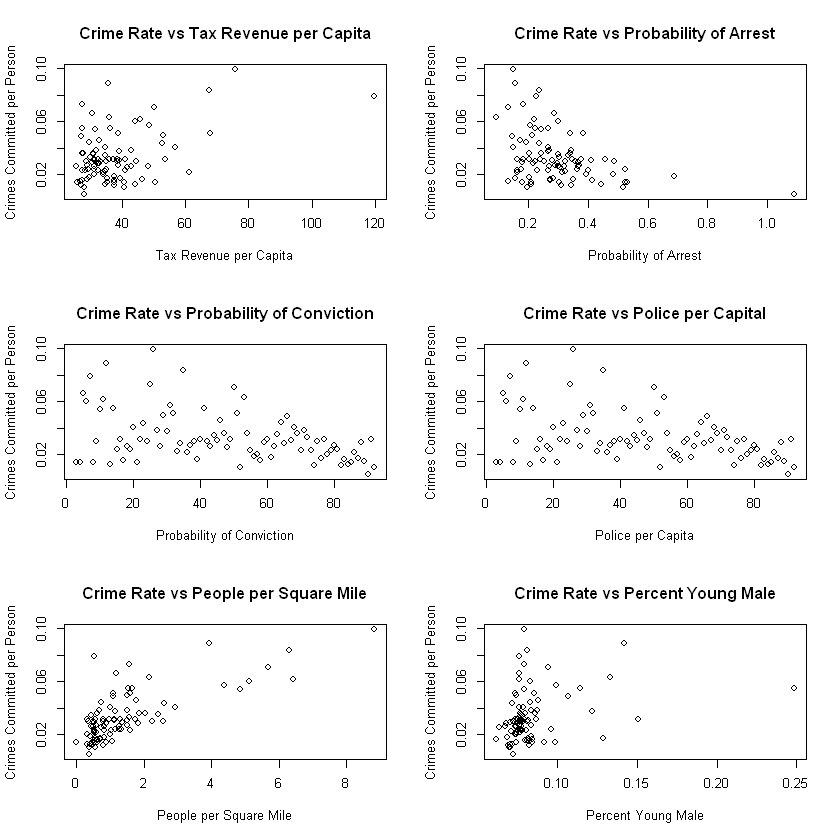

In [23]:
# plot crmrte and hypothesis variables
par(mfrow = c(3,2))

# crime and taxpc
plot(crime$taxpc, crime$crmrte, 
     main = "Crime Rate vs Tax Revenue per Capita",
     xlab = "Tax Revenue per Capita",
     ylab = "Crimes Committed per Person")

# crime and prbarr
plot(crime$prbarr, crime$crmrte, 
     main = "Crime Rate vs Probability of Arrest",
     xlab = "Probability of Arrest",
     ylab = "Crimes Committed per Person")

# crime and prbconv
plot(crime$prbconv, crime$crmrte, 
     main = "Crime Rate vs Probability of Conviction",
     xlab = "Probability of Conviction",
     ylab = "Crimes Committed per Person")

# crime and polc
plot(crime$prbconv, crime$crmrte, 
     main = "Crime Rate vs Police per Capital",
     xlab = "Police per Capita",
     ylab = "Crimes Committed per Person")

# crime and density
plot(crime$density, crime$crmrte, 
     main = "Crime Rate vs People per Square Mile",
     xlab = "People per Square Mile",
     ylab = "Crimes Committed per Person")

# crime and pctymle
plot(crime$pctymle, crime$crmrte, 
     main = "Crime Rate vs Percent Young Male",
     xlab = "Percent Young Male",
     ylab = "Crimes Committed per Person")

**Run correlation test to understand linearities against crmrte**

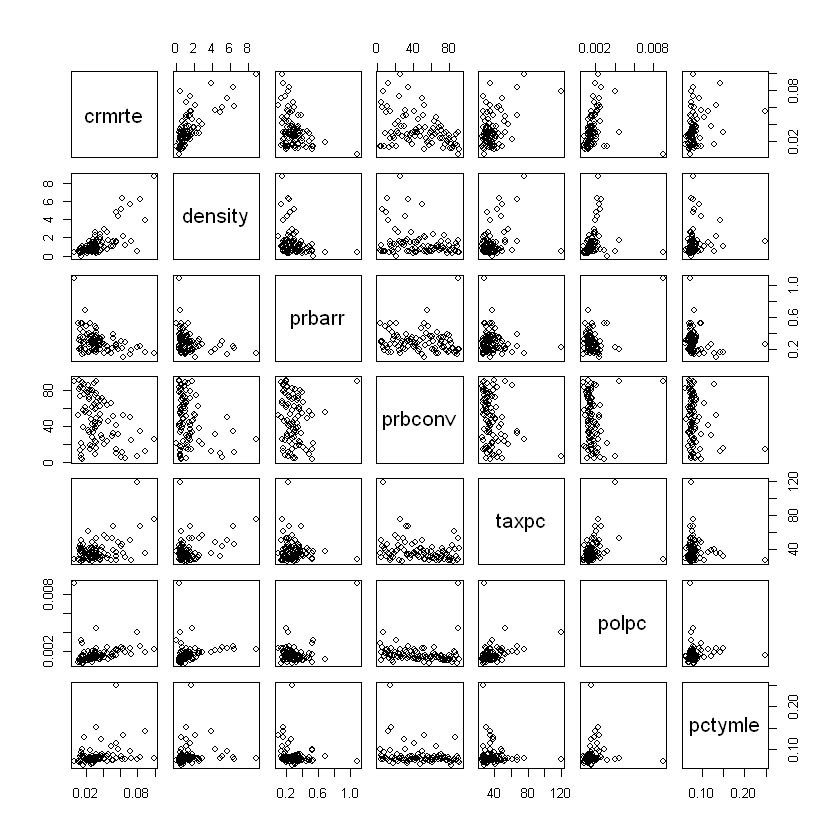

In [18]:
crime_matrix <- crime[, c('crmrte', 'density','prbarr', 'prbconv','taxpc','polpc', 'pctymle')]

plot(crime_matrix)

In [17]:
# crime and taxpc
cor.test(crime$taxpc, crime$crmrte)

# crime and prbarr
cor.test(crime$prbarr, crime$crmrte)

# crime and prbconv
cor.test(crime$prbconv, crime$crmrte)

# crime and polpc
cor.test(crime$polpc, crime$crmrte)

# crime and density
cor.test(crime$density, crime$crmrte)

# crime and pctymle
cor.test(crime$pctymle, crime$crmrte)


	Pearson's product-moment correlation

data:  crime$taxpc and crime$crmrte
t = 4.7668, df = 89, p-value = 7.252e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2701232 0.6010966
sample estimates:
      cor 
0.4509798 



	Pearson's product-moment correlation

data:  crime$prbarr and crime$crmrte
t = -4.036, df = 89, p-value = 0.0001148
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5543684 -0.2039018
sample estimates:
       cor 
-0.3933297 



	Pearson's product-moment correlation

data:  crime$prbconv and crime$crmrte
t = -4.0956, df = 89, p-value = 9.255e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5583790 -0.2094623
sample estimates:
       cor 
-0.3982285 



	Pearson's product-moment correlation

data:  crime$polpc and crime$crmrte
t = 1.6263, df = 89, p-value = 0.1074
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03736736  0.36312508
sample estimates:
      cor 
0.1698849 



	Pearson's product-moment correlation

data:  crime$density and crime$crmrte
t = 10.046, df = 89, p-value = 2.573e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6154070 0.8128743
sample estimates:
      cor 
0.7289632 



	Pearson's product-moment correlation

data:  crime$pctymle and crime$crmrte
t = 2.8721, df = 89, p-value = 0.005096
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09074673 0.46905867
sample estimates:
      cor 
0.2912485 


**Do log transofrmation on polpc and pctymle to see if linearity improves**

In [21]:
# crime and polpc
cor.test(log(crime$polpc), crime$crmrte)

# crime and pctymle
cor.test(log(crime$pctymle), crime$crmrte)


	Pearson's product-moment correlation

data:  log(crime$polpc) and crime$crmrte
t = 4.0127, df = 89, p-value = 0.0001248
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2017282 0.5527962
sample estimates:
      cor 
0.3914119 



	Pearson's product-moment correlation

data:  log(crime$pctymle) and crime$crmrte
t = 3.2417, df = 89, p-value = 0.001673
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1275652 0.4976139
sample estimates:
      cor 
0.3249726 


## <font color = blue> Model 1 </font>
**One model with only the explanatory variables of key interest (possibly transformed, as determined by your EDA), and no other covariates.**

Explanatory variables selcted:
* crmrte
* prbarr
* prbconv
* polpc (log transformed)
* taxpc

In [24]:
model1 <- lm(crmrte~prbarr + prbconv + log(polpc) + taxpc,
             data = crime)

stargazer(model1, type = "text", title = "Model 1 Results",
         ci.levels = .95, align = T, single.row = T)


Model 1 Results
                        Dependent variable:    
                    ---------------------------
                              crmrte           
-----------------------------------------------
prbarr                   -0.066*** (0.011)     
prbconv                 -0.0002*** (0.0001)    
log(polpc)               0.019*** (0.004)      
taxpc                    0.0002* (0.0001)      
Constant                 0.178*** (0.031)      
-----------------------------------------------
Observations                    91             
R2                             0.529           
Adjusted R2                    0.507           
Residual Std. Error       0.013 (df = 86)      
F Statistic           24.139*** (df = 4; 86)   
Note:               *p<0.1; **p<0.05; ***p<0.01

Model 1 Results
=====
0.950
-----


**Check Linear Regression Assumptions**

1. **Data Linearity:** the relationshi between predictor (x) and the outcome (y) is assumed to be linear

2. **Normality of residuals:** the residual errors are assumed to be normally distributed

3. **Homogeneity of residual variance:** the residuals are assumed to have a constant variance

4. **Independence of residentials error terms**

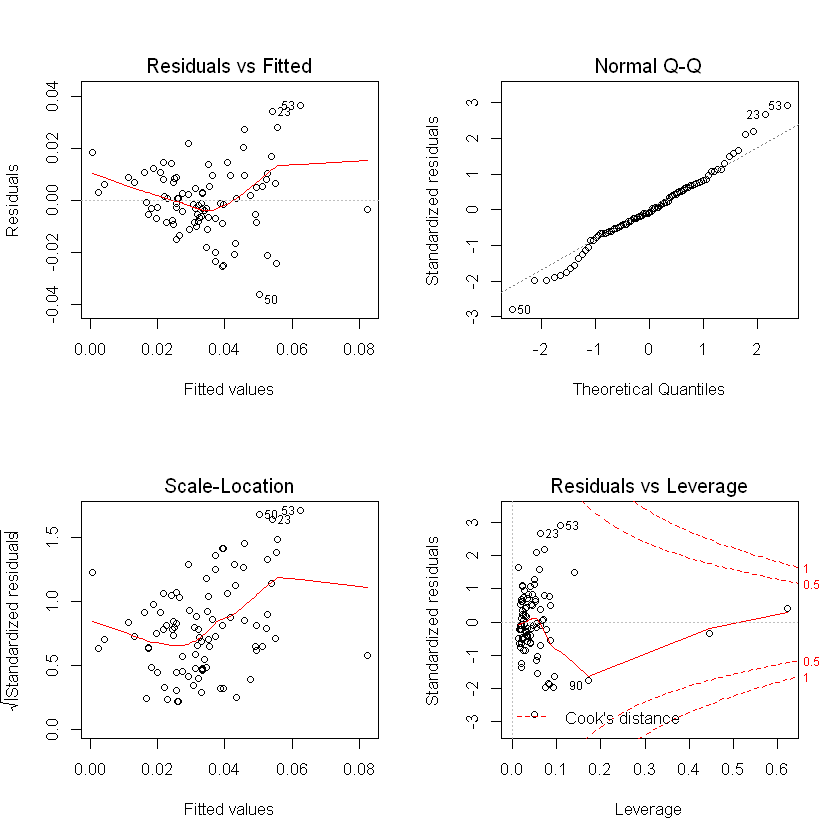

In [26]:
# regression diagnostics plots to check data assumptions
par(mfrow = c(2,2))
plot(model1)

**Model 1 Linear Regression Assumption Interpretations**

1. **Residuals vs Fitted:** this diagnostic plot is used to check the linear relationship assumptions. A horizontal line indicates a linear relationship. Note that for Model 1, our data (indicated by red line) deviates from the horizontal dotted line, which may suggest the presence of a pattern and indicate a problem with aspects of our model. 

2. **Normal Q-Q:** this diagnostic plot is used to examine whether the residuals are normally distributed. A straight dashed line indicates a good normal distribution. Note that for Model 1, our data follows the straight dashed line, which is good...

3. **Scale-Location:** this diagnostic plot is used to check the homogeneity of variance of the residuals. A horizontal line with equally spread points indicate homoscedasticity. Note that for Model 1, this is not the case as the residual points increase and decrease with the value of the fitted outcome variable. This may suggest non-constant variances in the residuals errors. 

4. **Residuals vs Leverage:** this diagnostic plot is used to identify extreme values that might influence regression results when included or excluded from the model. Note that for Model 1, we notice the presence of outliers on the upper and lower right corner which may influence against a regression line in our model.